In [116]:
import pandas as pd

data = pd.read_csv('nuevo_df.csv')
data = data.drop('Otro..especifique..1', axis=1)

data.head()

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
1,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos
2,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,60-90 minutos
3,Sí,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
4,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos


In [117]:
# Nombre del archivo donde guardarás la información
filename = 'column_values.txt'

# Abrir un archivo para escribir
with open(filename, 'w') as file:
    for column in data.columns:
        # Obtener los valores únicos y convertirlos a lista
        unique_values = data[column].unique().tolist()
        # Crear una cadena de texto con el nombre de la columna y sus valores únicos
        unique_values_str = ', '.join(map(str, unique_values))
        # Escribir en el archivo
        file.write(f'{column}:\n{unique_values_str}\n\n')

print(f'Archivo "{filename}" ha sido creado exitosamente.')

Archivo "column_values.txt" ha sido creado exitosamente.


In [118]:
import pandas as pd

print("Valores únicos antes de la limpieza:\n", data['duracion_intervencion'].unique(),'\n')

data = data[~data['duracion_intervencion'].isin(['0', 'Response'])]
#data = data.loc[data['duracion_intervencion'] != '0-5 minutos']
#data = data.loc[data['duracion_intervencion'] != '>180 minutos']

print("Valores únicos después de la limpieza:\n", data['duracion_intervencion'].unique())

# Resetear el índice del DataFrame limpio
data.reset_index(drop=True, inplace=True)

Valores únicos antes de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '0' '120-180 minutos' '90-120 minutos'
 '>180 minutos' 'Response'] 

Valores únicos después de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '120-180 minutos' '90-120 minutos'
 '>180 minutos']


In [119]:
tiempo = data['duracion_intervencion'].copy()
data.drop('duracion_intervencion', axis = 1, inplace=True)


#!pip install datacleaner
from datacleaner import autoclean

data= autoclean(data)

data['duracion_intervencion'] = tiempo

In [120]:
categorical_cols = [col for col in data.columns if col != 'duracion_intervencion']

df_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

df_encoded.head()

,duracion_intervencion,Medicación.Actual_1,Alcohol_1,Alcohol_2,Otras.Drogas_1,Tipo.de.Intervención.Quirúrgica_1,Tipo.de.Intervención.Quirúrgica_2,Tipo.de.cirugía_1,Tipo.de.cirugía_2,Tipo.de.cirugía_3,...,Implante.3...Defecto.tipo.II..supraóseo..3_1,Implante.4...Posición.2_1,Implante.4...Defecto.tipo.I..infraóseo..2_1,Implante.4...Defecto.tipo.II..supraóseo..2_1,Implante.5...Posición.1_1,Implante.5...Defecto.tipo.I..infraóseo..1_1,Implante.5...Defecto.tipo.II..supraóseo..1_1,Implante.6...Posición_1,Implante.6...Defecto.tipo.I..infraóseo._1,Implante.6...Defecto.tipo.II..supraóseo._1
0,10-20 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20-40 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,60-90 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10-20 minutos,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20-40 minutos,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
data['duracion_intervencion'].value_counts()

duracion_intervencion
20-40 minutos      955
10-20 minutos      761
40-60 minutos      361
5-10 minutos       354
60-90 minutos      160
0-5 minutos        127
90-120 minutos      58
120-180 minutos     22
>180 minutos         8
Name: count, dtype: int64

In [122]:
# Convertir duración de intervención a minutos
duration_mapping = {
    '>180 minutos': 180,
    '120-180 minutos': 150,
    '90-120 minutos': 105,
    '0-5 minutos': 5,
    '5-10 minutos': 7.5,
    '40-60 minutos': 50,
    '10-20 minutos': 15,
    '20-40 minutos': 30,
    '60-90 minutos': 75}

data['duracion_intervencion'] = data['duracion_intervencion'].replace(duration_mapping)

In [123]:
data['duracion_intervencion']

0       15.0
1       30.0
2       75.0
3       15.0
4       30.0
        ... 
2801    50.0
2802    15.0
2803     7.5
2804    15.0
2805    15.0
Name: duracion_intervencion, Length: 2806, dtype: float64

In [124]:
data

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75.0
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50.0
2802,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
2803,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.5
2804,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0


# Extraccion de caracteristicas RF

In [125]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

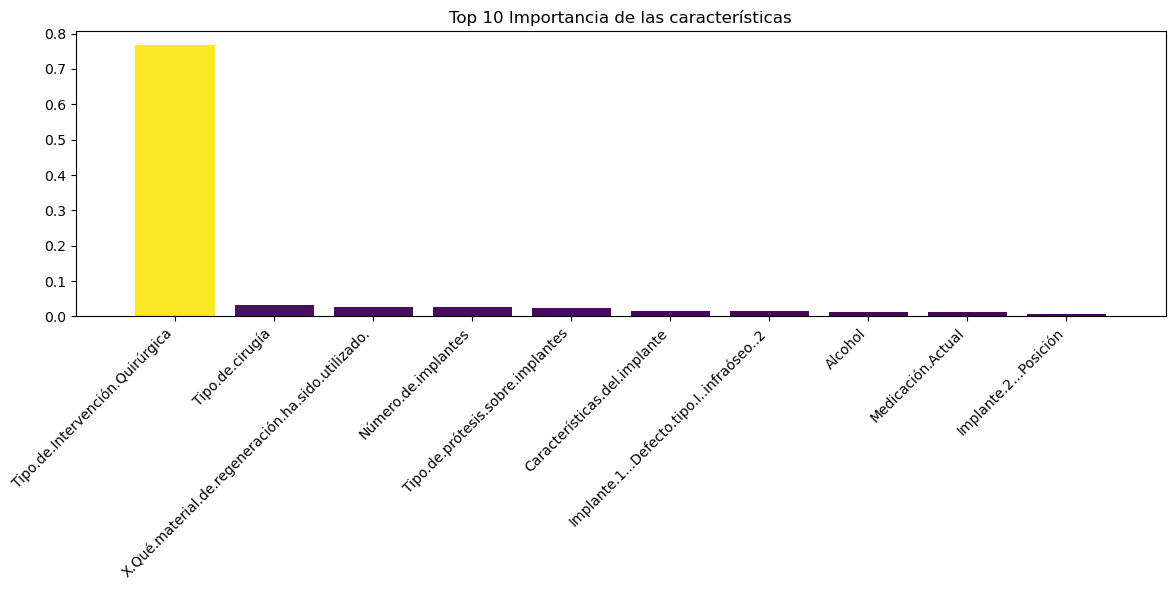

In [126]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest para regresión
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = data.columns.tolist()

# Asegurarte de no incluir la columna objetivo en la lista de nombres de características
feature_names = np.array([name for name in feature_names if name != 'duracion_intervencion'])
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = data[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo


In [127]:
data_reduced.columns = ['Tipo Intervencion', 
                'Tipo de Cirugia', 
                "Material de regeneracion",
                "Numero de implante",
                "Tipo de Pprotesis sobre implante",
                "Caracteristicas del implante",
                "Implante 1 defecto tipo 1 infraóseo",
                "Alcohol",
               "Medicacion actual", 
                "Posicion del implante", 
                "duracion_intervencion"]

In [128]:
data = data_reduced

data.head()

,Tipo Intervencion,Tipo de Cirugia,Material de regeneracion,Numero de implante,Tipo de Pprotesis sobre implante,Caracteristicas del implante,Implante 1 defecto tipo 1 infraóseo,Alcohol,Medicacion actual,Posicion del implante,duracion_intervencion
0,0,0,0,0,0,0,0,2,0,0,15.0
1,0,0,0,0,0,0,0,2,0,0,30.0
2,0,0,0,0,0,0,0,2,0,0,75.0
3,0,0,0,0,0,0,0,2,1,0,15.0
4,0,0,0,0,0,0,0,2,0,0,30.0


# Arbol de Regresión

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear y entrenar el modelo
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, Y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)



# Calcular errores
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

# Resultados de las métricas
mae, mse, rmse

# Descomentar para ejecución real
# model.fit(X, y)
# df.to_csv('data_prepared.csv', index=False)


(14.738661537786431, 407.5186884525909, 20.187092124736314)

In [133]:
# Exportamos el modelo
from joblib import dump

# Supongamos que 'modelo' es tu modelo entrenado
dump(model, 'modelo_entrenado.joblib')


['modelo_entrenado.joblib']

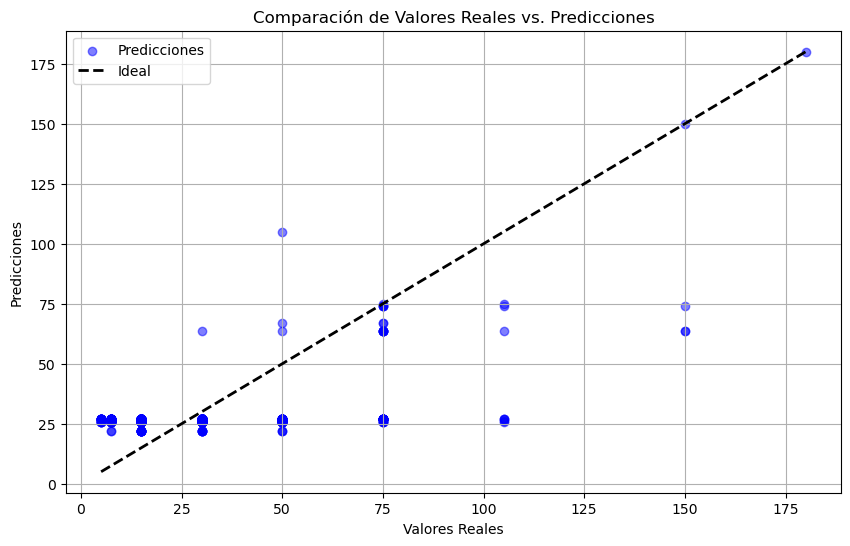

In [130]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de los valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


## Análisis de Residuos

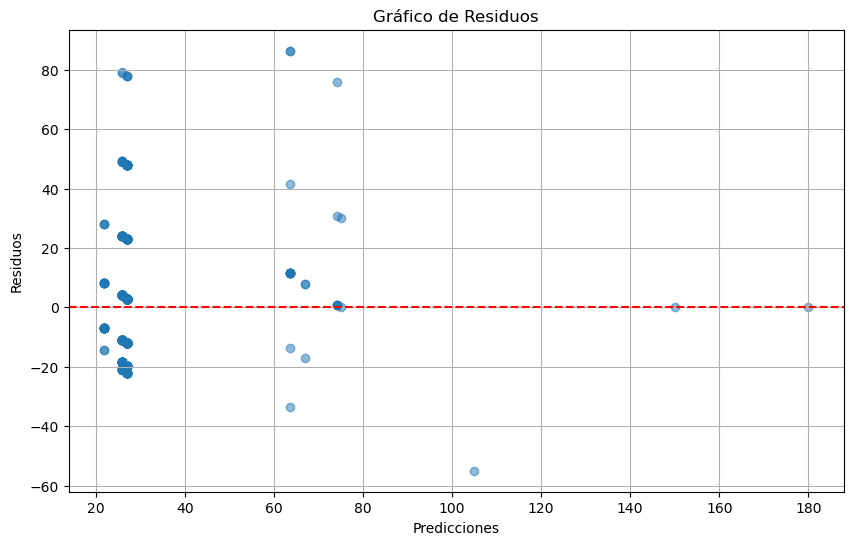

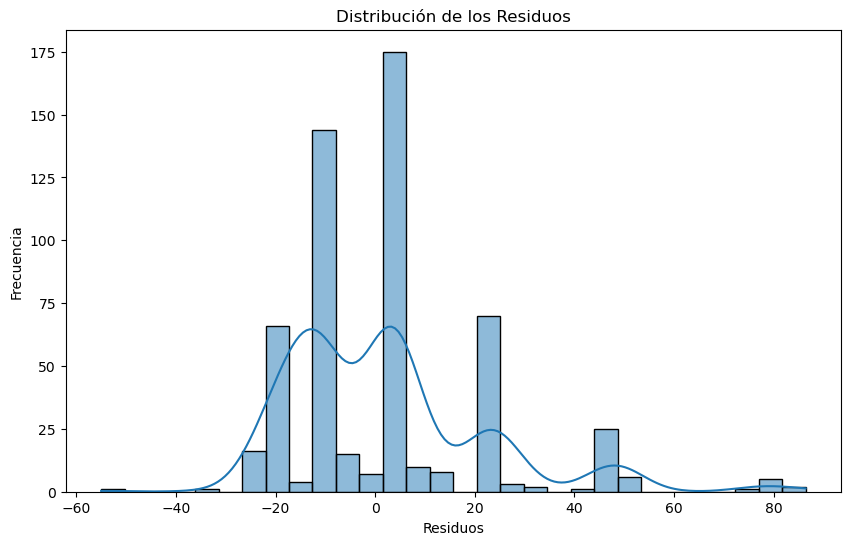

Estadística de la prueba: 143.2940448703357
p-valor: 7.657614717229793e-32


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

# 1. Calcular los Residuos
residuos = Y_test - y_pred

# 2. Gráfico de Residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Visualizando la distribución de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# 3. Prueba de Normalidad
stat, p = normaltest(residuos)
print('Estadística de la prueba:', stat)
print('p-valor:', p)



### Gráfico de Residuos
El **gráfico de residuos** muestra una dispersión de los residuos en función de las predicciones. Idealmente, los residuos deberían estar distribuidos al azar alrededor de la línea horizontal (y=0), sin formar patrones. En tu gráfico:
- Parece haber cierta dispersión aleatoria, pero también hay indicios de que para predicciones más altas, los residuos tienden a ser más negativos. Esto puede indicar que el modelo tiende a sobreestimar para valores altos.

### Distribución de los Residuos
La **distribución de los residuos** parece sesgada hacia la izquierda, lo que indica que hay un número significativo de predicciones que fueron sistemáticamente más altas que los valores reales (sobreestimación). La forma de la distribución no es simétrica y muestra varios picos, lo cual no es ideal.

### Prueba de Normalidad
La **estadística de la prueba** es muy alta y el **p-valor** es extremadamente bajo, lo cual rechaza fuertemente la hipótesis de normalidad. Esto confirma que los residuos no siguen una distribución normal.
